# Lost classes - 01|06|08

ggplot and understanding some functions

https://r2022.netlify.app/

In [1]:
#source("/work/AiRoute/university-stuff/statistical_computing/sources/mismacros.txt")
install.packages("readxl")
library(readxl)
install.packages("readr")
library(readr)
install.packages("stringr")
library(stringr)
install.packages("dplyr")
library(dplyr)
install.packages("sqldf")
library(sqldf)
install.packages("dplyr")
library(dplyr)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("readxl"):
“installation of package ‘readxl’ had non-zero exit status”
Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("readr"):
“installation of package ‘readr’ had non-zero exit status”
Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loa

In [2]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [3]:
advertising <- read_excel("/datasets/university-drive/CE/Advertising.xlsx")
str(advertising)

tibble [200 × 4] (S3: tbl_df/tbl/data.frame)
 $ TV       : num [1:200] 230.1 44.5 17.2 151.5 180.8 ...
 $ radio    : num [1:200] 37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ newspaper: num [1:200] 69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ sales    : num [1:200] 22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


In [4]:
head(advertising)

TV,radio,newspaper,sales
<dbl>,<dbl>,<dbl>,<dbl>
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


## Ejemplos

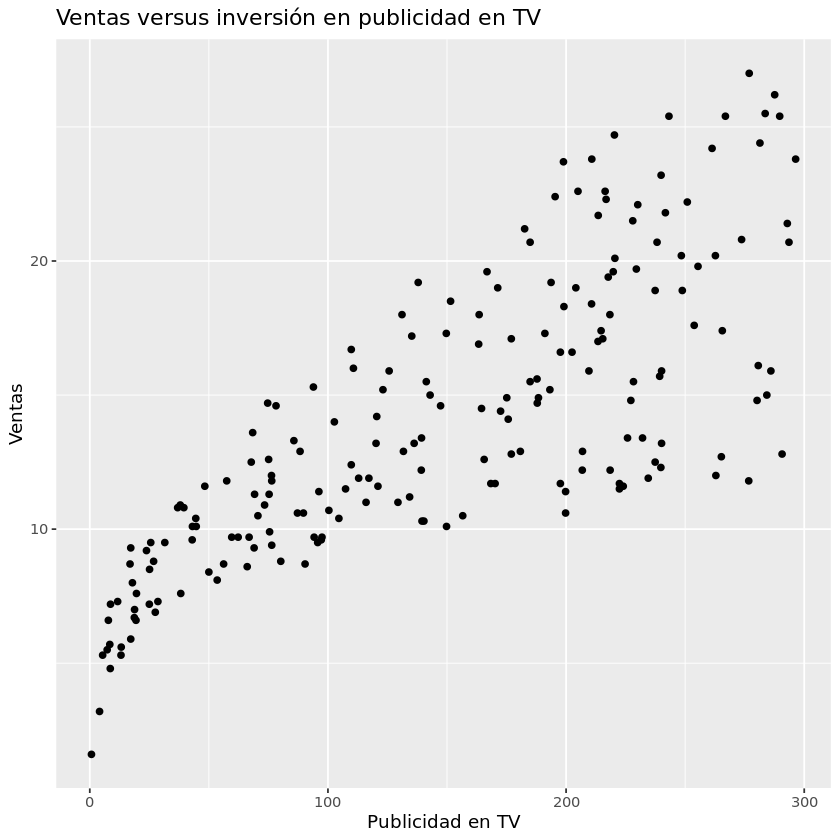

In [5]:
ggplot(advertising,aes(x=TV,y=sales)) +
       geom_point() +
       labs(title="Ventas versus inversión en publicidad en TV",x="Publicidad en TV",y="Ventas") +
       theme_gray()

## Ejemplo 2

In [6]:
mitema <- 
theme(
  plot.title=element_text(family="sans",face="bold",size=20,vjust=0.5,hjust=0.5,color="black",angle=0),
  axis.title.x=element_text(family="sans",face="bold",size=18,vjust=0.5,hjust=0.5,color="blue",angle=0),
  axis.title.y=element_text(family="sans",face="bold",size=18,vjust=0.5,hjust=0.5,color="blue",angle=90),
  axis.text.x=element_text(family="mono",face="bold",size=14,vjust=0.5,hjust=0.5,color="black",angle=0),
  axis.text.y=element_text(family="mono",face="bold",size=14,vjust=0.5,hjust=0.5,color="black",angle=0),
  panel.background=element_rect(fill="gray92"),
  panel.grid.major=element_line(color="white",size=1),
  panel.grid.minor=element_line(color="white",size=0.5)
     )

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [7]:
mitema <- mitema + 
theme(legend.position="right",
      legend.title=element_text(family="sans",face="bold",size=15,hjust=0.5,vjust=0.5,color="black",angle=0),
      legend.text=element_text(family="sans",face="plain",size=13,hjust=0.0,vjust=0.5,color="black",angle=0),
      legend.direction="vertical"
     )

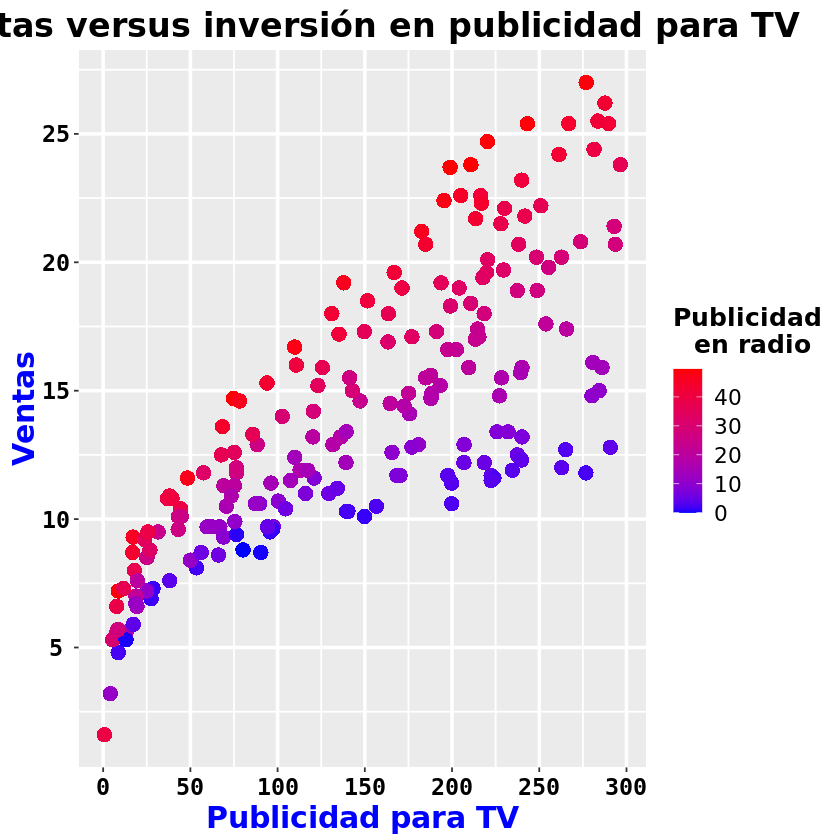

In [8]:
ggplot(advertising,aes(x=TV,y=sales,color=radio)) +
       geom_point(size=4,shape=16) +
       scale_x_continuous(breaks=seq(from=0,to=300,by=50)) +
       scale_y_continuous(breaks=seq(from=0,to=30,by=5)) +
       labs(title="Ventas versus inversión en publicidad para TV",x="Publicidad para TV",
            y="Ventas",color="Publicidad\n en radio") +
       scale_color_gradient(low="blue",high="red",breaks=seq(0,50,10)) + mitema

## Ejemplo 3

In [9]:
help(cut_number)

In [10]:
names <- c("Baja","Media","Alta")
advertising <- within(advertising,radioC <- cut_number(radio,n=3,labels=names))
with(advertising,table(radioC))

radioC
 Baja Media  Alta 
   68    65    67 

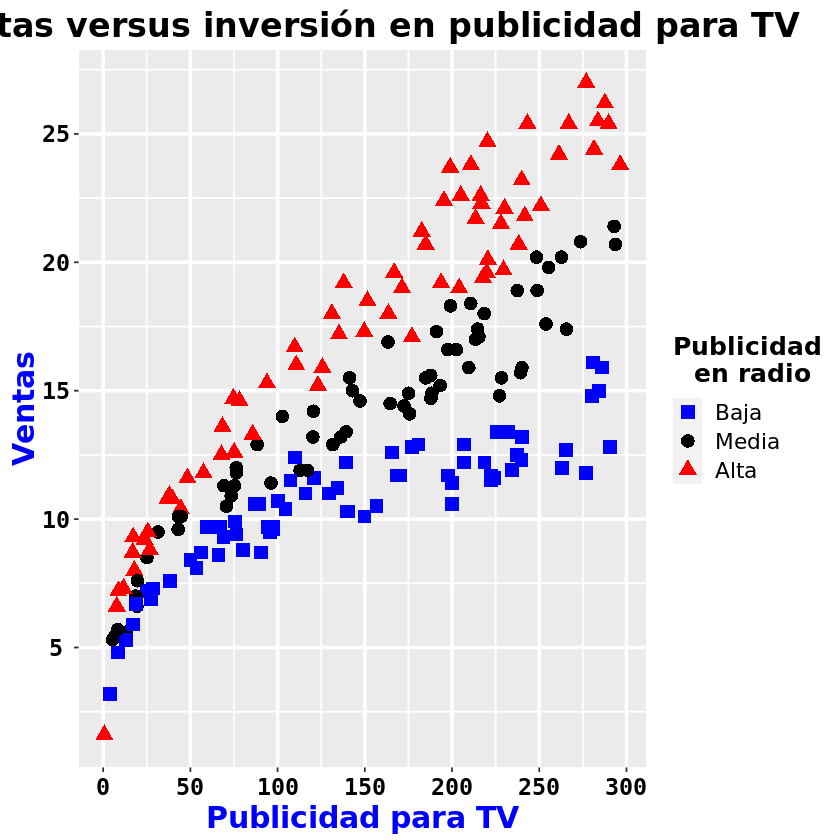

In [11]:
ggplot(advertising,aes(x=TV,y=sales,color=radioC,shape=radioC)) +
       geom_point(size=3.5) +
       labs(title="Ventas versus inversión en publicidad para TV",x="Publicidad para TV",
            y="Ventas",color="Publicidad\n en radio",shape="Publicidad\n en radio") +
       scale_x_continuous(breaks=seq(from=0,to=300,by=50)) +
       scale_y_continuous(breaks=seq(from=0,to=30,by=5)) +
       scale_color_manual(values=c("blue","black","red")) +
       scale_shape_manual(values=c(15,16,17)) + mitema

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


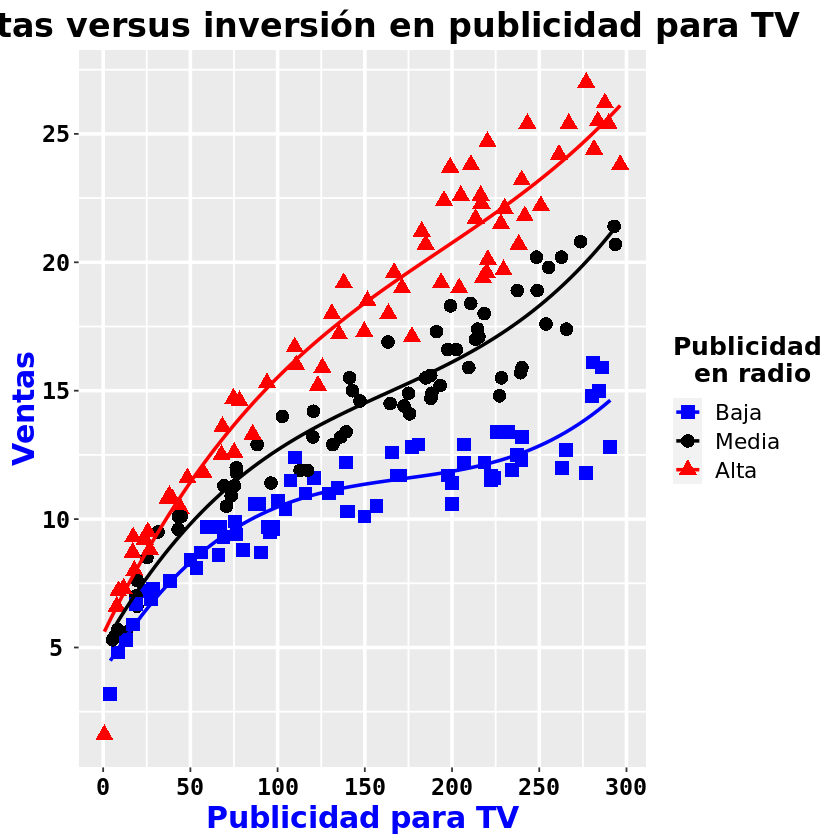

In [12]:
ggplot(advertising,aes(x=TV,y=sales,color=radioC,shape=radioC)) +
       geom_point(size=3.5) +
       geom_smooth(method="lm",formula=y ~ poly(x,degree=3),se=FALSE,size=1,linetype="solid") +
       scale_x_continuous(breaks=seq(from=0,to=300,by=50)) +
       scale_y_continuous(breaks=seq(from=0,to=30,by=5)) +
       labs(title="Ventas versus inversión en publicidad para TV",x="Publicidad para TV",
            y="Ventas",color="Publicidad\n en radio",shape="Publicidad\n en radio") +
       scale_color_manual(values=c("blue","black","red")) +
       scale_shape_manual(values=c(15,16,17)) + mitema

## Ejemplo 4

In [13]:
names <- c("Baja","Media baja","Media alta","Alta")
advertising <- within(advertising,newspaperC <- cut_number(newspaper,n=4,labels=names))
with(advertising,table(newspaperC))

newspaperC
      Baja Media baja Media alta       Alta 
        50         50         51         49 

In [14]:
help(facet_wrap)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


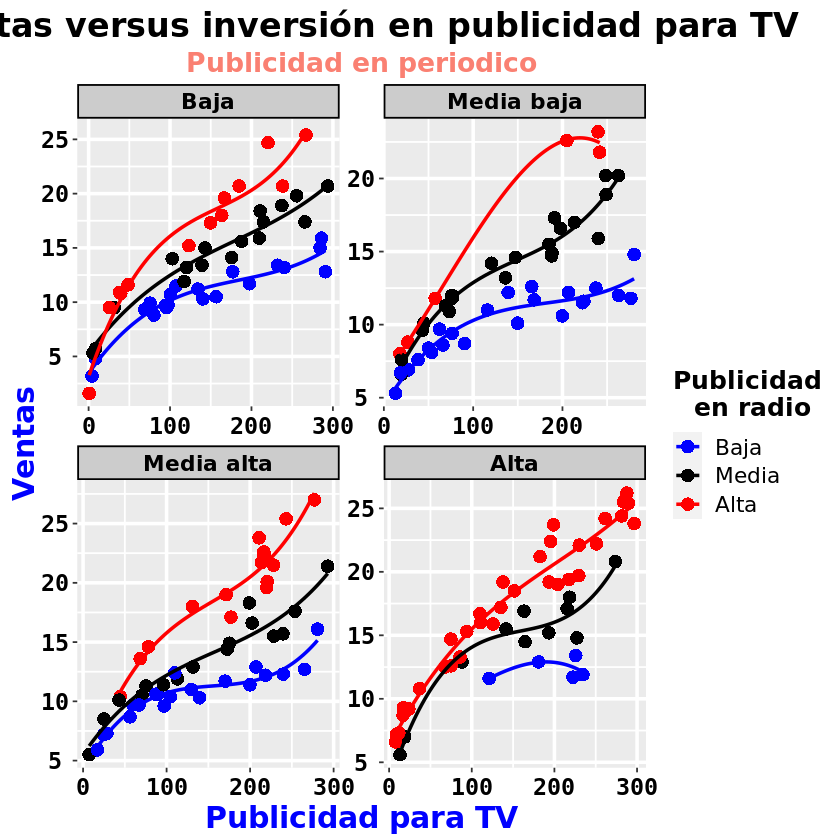

In [15]:
ggplot(advertising,aes(x=TV,y=sales,color=radioC)) +
       geom_point(size=3.5,shape=16) +
       geom_smooth(method="lm",formula=y ~ poly(x,degree=3),se=FALSE,size=1,linetype="solid") + 
       labs(title="Ventas versus inversión en publicidad para TV",x="Publicidad para TV",
            y="Ventas",subtitle="Publicidad en periodico",color="Publicidad\n en radio") +
       scale_color_manual(values=c("blue","black","red")) +
       facet_wrap(vars(newspaperC),ncol=2,nrow=2,strip.position="top",dir="h",scales="free") + mitema + 
       theme(
             plot.subtitle=element_text(face="bold",size=16,vjust=0.5,hjust=0.5,color="salmon"),
             strip.background=element_rect(color="black",fill="gray80",size=1),
             strip.text=element_text(face="bold",size=13,vjust=0.5,hjust=0.5,color="black",angle=0)
            )

## Ejemplo 5

In [16]:
names <- c("Baja","Media baja","Media alta","Alta")
names2 <- c("Baja","Media","Alta")
advertising <- within(advertising,{
                      radioC <- cut_number(radio,n=4,labels=names)
                      TVC <- cut_number(TV,n=3,labels=names2)
                      })
with(advertising,table(radioC))
with(advertising,table(TVC))

radioC
      Baja Media baja Media alta       Alta 
        50         50         50         50 

TVC
 Baja Media  Alta 
   67    66    67 

In [17]:
help(geom_boxplot)

Warning message:
“Removed 9 rows containing non-finite values (`stat_boxplot()`).”


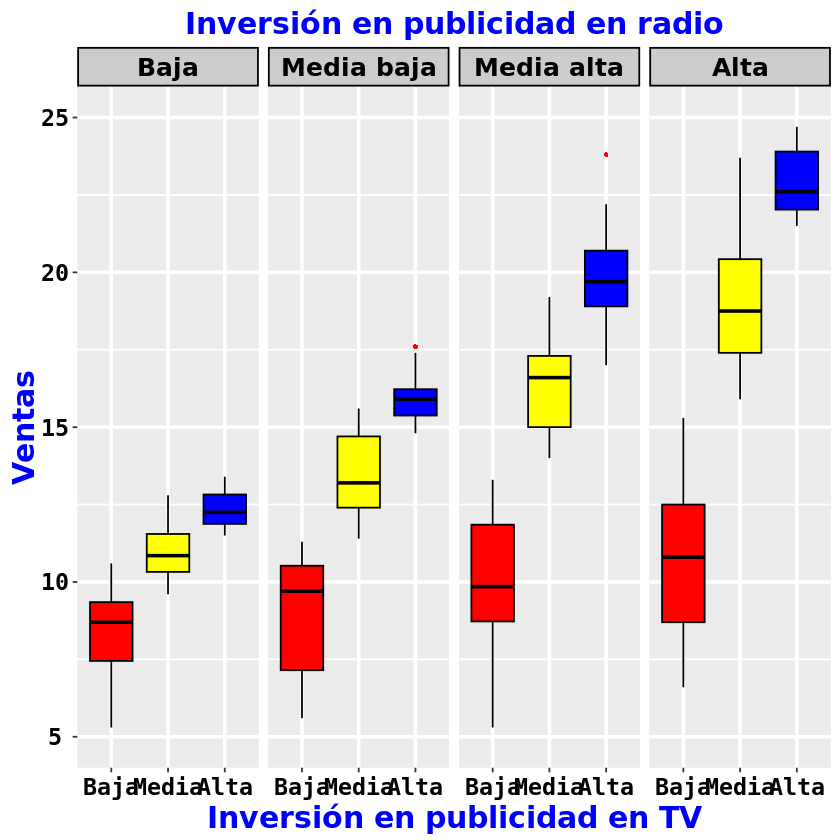

In [18]:
ggplot(advertising,aes(x=TVC,y=sales,fill=TVC)) +
       geom_boxplot(outlier.shape=16,outlier.color="red",outlier.size=1,color="black",linetype="solid") + 
       scale_y_continuous(breaks=seq(from=0,to=25,by=5),limits=c(5,25)) + 
       scale_fill_manual(values=c("red","yellow","blue")) + 
       labs(subtitle="Inversión en publicidad en radio",
            x="Inversión en publicidad en TV", y="Ventas") +
       facet_wrap(vars(radioC),ncol=4,nrow=1,strip.position="top",dir="h",scales="fixed") + mitema + 
       theme(
            legend.position="none",
            plot.subtitle=element_text(face="bold",size=18,vjust=0.5,hjust=0.5,color="blue"),
            strip.background=element_rect(color="black",fill="gray80",size=1),
            strip.text=element_text(face="bold",size=15,vjust=0.5,hjust=0.5,color="black",angle=0)
            )

## Ejemplo 6

In [19]:
Municipios <- readRDS("/work/AiRoute/university-stuff/statistical_computing/sources/outputs/Municipios.RDS")

In [24]:
Pobl <- Municipios %>% 
        group_by(Region) %>% 
        summarise(freq=sum(Poblacion)) %>% 
        mutate(percent=round(100*freq/sum(freq),digits=1),
               labels=paste0(str_replace(Region,"Región ",""),"\n (",percent,"%)"))

head(Pobl)

Region,freq,percent,labels
<chr>,<dbl>,<dbl>,<chr>
Región Caribe,11060389,22.4,Caribe (22.4%)
Región Centro Oriente,15712252,31.9,Centro Oriente (31.9%)
Región Centro Sur,3284811,6.7,Centro Sur (6.7%)
Región Eje Cafetero,9058916,18.4,Eje Cafetero (18.4%)
Región Llano,2047258,4.2,Llano (4.2%)
Región Pacífico,8134239,16.5,Pacífico (16.5%)


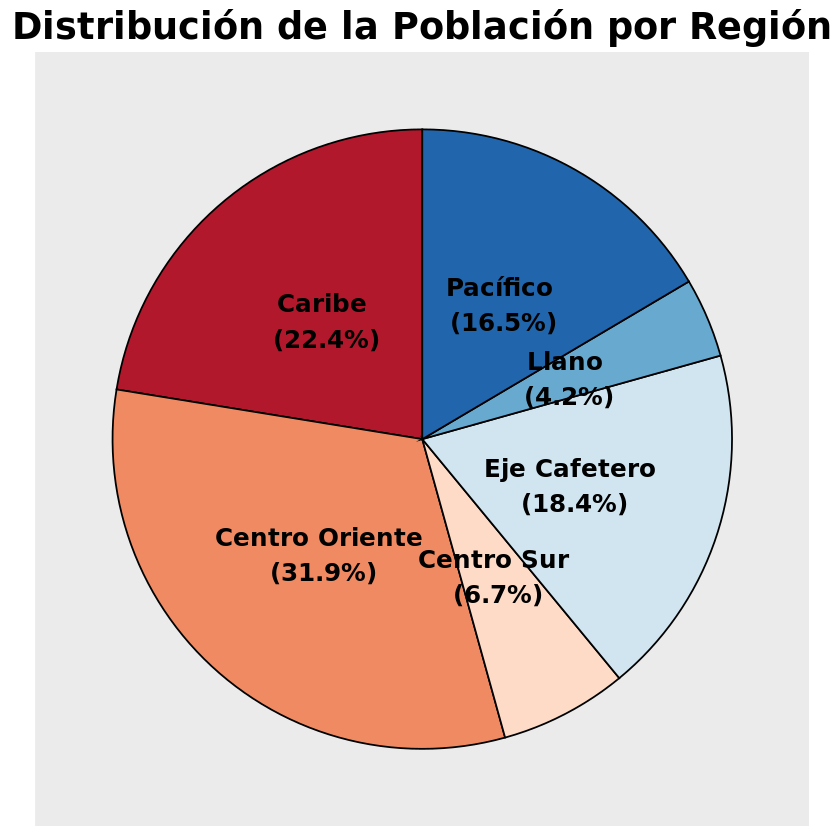

In [21]:
ggplot(Pobl,aes(x="",y=freq,fill=Region)) +
  geom_col(color="black",linetype="solid") +
  geom_text(aes(label=labels),position=position_stack(vjust=0.5),size=5.2,fontface="bold") +
  coord_polar(theta="y") +
  labs(title="Distribución de la Población por Región") + 
  scale_fill_brewer(palette="RdBu") + 
  theme(axis.text = element_blank(),axis.ticks = element_blank(),
        axis.title = element_blank(),panel.grid = element_blank(),
        panel.background=element_rect(fill="gray92"),legend.position="none",
        plot.title=element_text(family="sans",face="bold",size=22,
        vjust=0.5,hjust=0.5,color="black"))

## Ejemplo 7

In [ ]:
help(geom_bar)

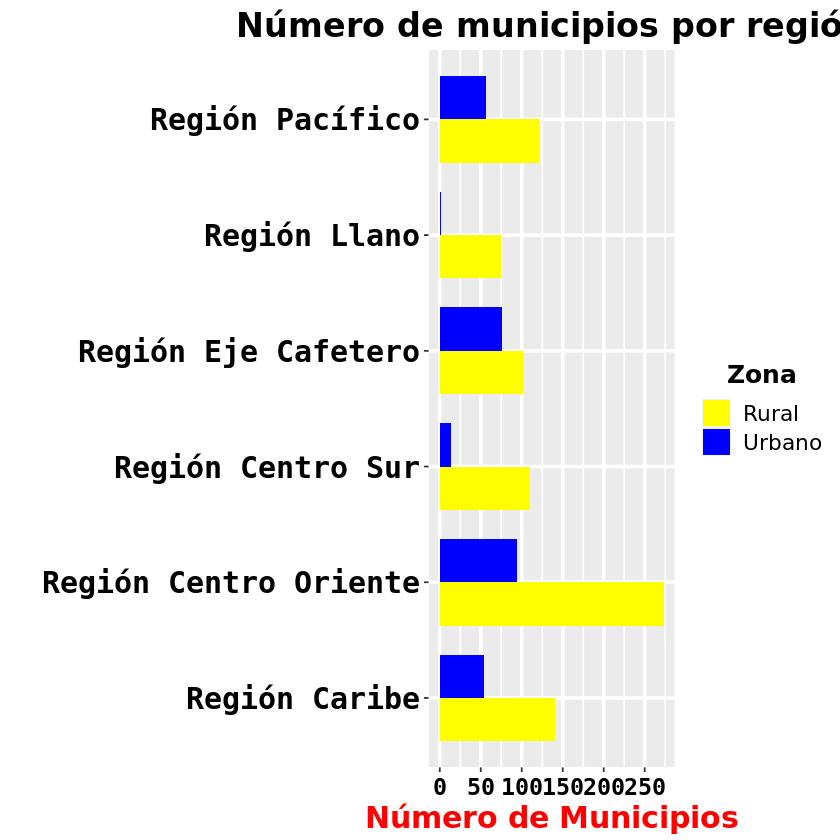

In [22]:
ggplot(Municipios, aes(Region)) + 
geom_bar(aes(fill=Zona),position=position_dodge(),width=0.75) + 
scale_y_continuous(breaks=seq(from=0,to=300,by=50)) + 
scale_fill_manual(values=c("yellow","blue")) + 
labs(title="Número de municipios por región", x=" ", y="Número de Municipios") + 
coord_flip() + 
mitema + theme(legend.position="right",
               axis.text.y=element_text(size=18,hjust=1),
               axis.title.x=element_text(color="red"))

## Ejemplo 8

In [23]:
install.packages("sf")
library(sf)
help(st_read)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Warning message in install.packages("sf"):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("sf"):
“installation of package ‘s2’ had non-zero exit status”
Warning message in install.packages("sf"):
“installation of package ‘sf’ had non-zero exit status”


ERROR: Error in library(sf): there is no package called ‘sf’


In [ ]:
deptos <- Municipios %>%
          group_by(Departamento,Dep) %>%
          summarise(Irural=sum(Poblacion*Irural)/sum(Poblacion)) %>%
          as.data.frame()
str(deptos)
 
deptoshp <- st_read("MGN_DPTO_POLITICO.shp",quiet=TRUE)
str(deptoshp)

mapdeptos <- deptoshp %>% left_join(deptos,by=c("DPTO_CCDGO"="Dep"))
str(mapdeptos)

mundoshp <- st_read("admin00.shp",quiet=TRUE)
mundocol <- mundoshp %>% 
            filter(CNTRY_NAME %in% c("Peru","Brazil","Venezuela","Ecuador","Panama"))
str(mundocol)

In [ ]:
help(geom_sf)

In [ ]:
box <- st_bbox(mapdeptos)
box

In [ ]:
ggplot() +
geom_sf(data=mundocol) +
geom_sf(data=mapdeptos,aes(fill=Irural),col="darkgray",linetype="solid") +
coord_sf(xlim=c(box$xmin,box$xmax),ylim=c(box$ymin,box$ymax),expand=FALSE) +
geom_sf_text(data=mapdeptos,aes(label=ifelse(Irural > 70,Departamento,"")),col="black",
             fontface="bold",size=4,fun.geometry=function(x) sf::st_centroid(x)) +
labs(x="Longitud",y="Latitud",title="Colombia",fill="Índice de\nRuralidad") +
scale_fill_gradient(low="white",high="red",n.breaks=5) +
annotate("text", x=c(-74.5,-68,-78,-69,-78.5), y=c(-2.5,0,-1,9,9), colour="blue",
         label=c("Perú","Brasil","Ecuador","Venezuela","Panamá")) +
theme(panel.background=element_rect(fill="lightblue"))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd2fca3f-dc64-4c71-8bd4-adda531fa911' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>